In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
%matplotlib inline

In [97]:
sns.set_style('darkgrid')

In [80]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape', sep=',')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [58]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [ ]:
df.drop([])

In [59]:
df = df[['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category','Amount',
       'Orders',  'Status', 'unnamed1']]

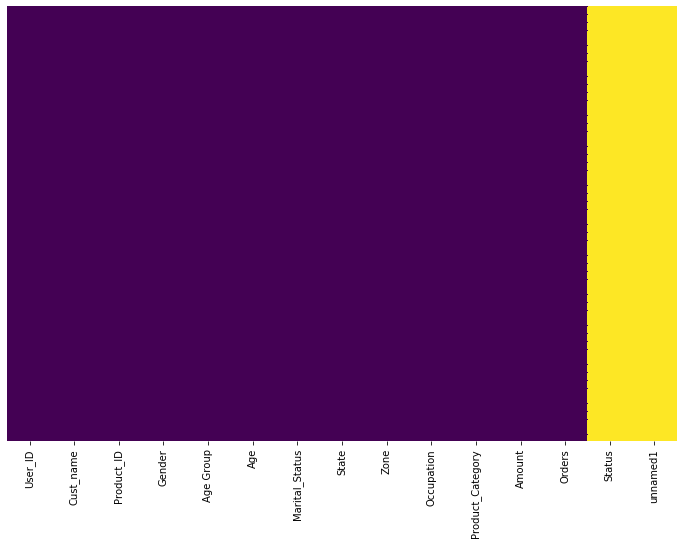

In [60]:
#Let's visualize the null values
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=False, yticklabels=False,cmap="viridis");

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Amount            11239 non-null  float64
 12  Orders            11251 non-null  int64  
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [81]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [83]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [84]:
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345.0
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202.0
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304.0


In [86]:
print('df.shape before dropping duplicates',df.shape)
df.drop_duplicates(inplace=True)
print('df.shape after dropping duplicates',df.shape)

df.shape before dropping duplicates (11251, 13)
df.shape after dropping duplicates (11243, 13)


In [87]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [94]:
df.dropna(inplace=True)

In [95]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

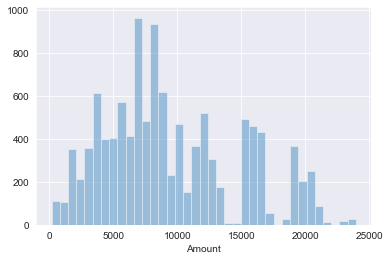

In [98]:
sns.distplot(df['Amount'],kde=False)

In [124]:
ax.containers

[<BarContainer object of 2 artists>]

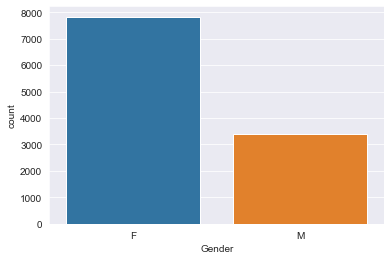

In [120]:
#let's check the ratio of male to female shoppers
ax = sns.countplot(x = 'Gender',data = df)
ax


In [117]:
df.groupby(by='Gender', as_index=False)['Amount'].sum()

,Gender,Amount
0,F,74307682.43
1,M,31871146.00


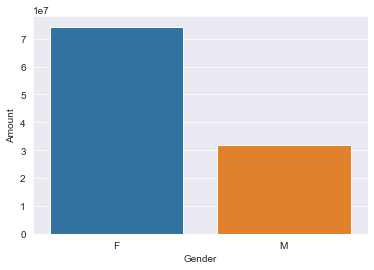

In [118]:
#let's check the total amount spent by male and female shoppers
sns.barplot(x='Gender', y='Amount', data=df.groupby(by='Gender', as_index=False)['Amount'].sum())

In [137]:
sales_age_group = df.groupby(by=['Age Group','Gender'], as_index=False)['Amount'].sum()

In [138]:
sales_age_group

,Age Group,Gender,Amount
0,0-17,F,1441409.00
1,0-17,M,1258244.00
2,18-25,F,11887003.00
3,18-25,M,5348527.00
4,26-35,F,30945639.94
5,26-35,M,11636129.00
6,36-45,F,15500098.49
7,36-45,M,6635038.00
8,46-50,F,6743393.00
9,46-50,M,2464451.00


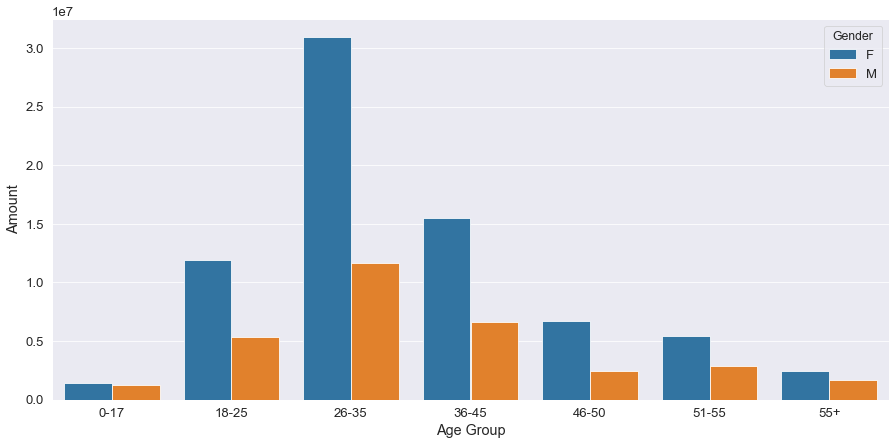

In [154]:
plt.figure(figsize=(15,7))
sns.set_context('paper', font_scale=1.5)
sns.barplot(x='Age Group',y='Amount',data=sales_age_group,hue='Gender')

In [141]:
sales_age_group.sort_values(by='Amount',ascending=False)

,Age Group,Gender,Amount
4,26-35,F,30945639.94
6,36-45,F,15500098.49
2,18-25,F,11887003.00
5,26-35,M,11636129.00
8,46-50,F,6743393.00
7,36-45,M,6635038.00
10,51-55,F,5385208.00
3,18-25,M,5348527.00
11,51-55,M,2852701.00
9,46-50,M,2464451.00


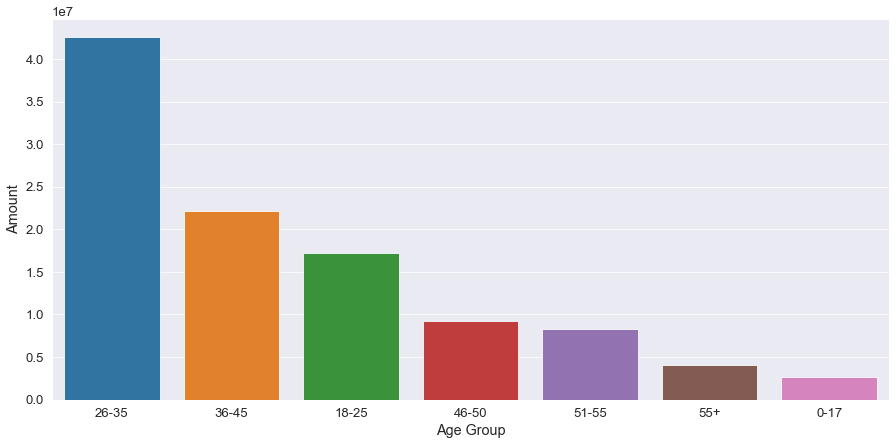

In [155]:
plt.figure(figsize=(15,7))
sns.set_context('paper', font_scale=1.5)
sns.barplot(x='Age Group',y='Amount',data=df.groupby(by=['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False))

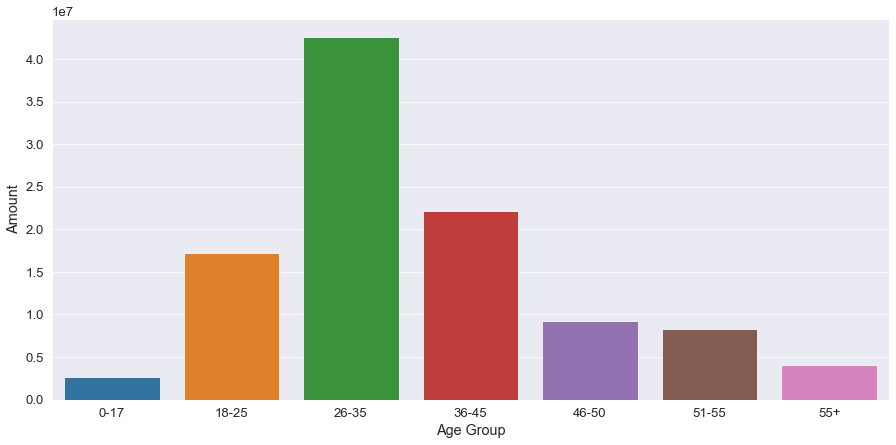

In [156]:
plt.figure(figsize=(15,7))
sns.set_context('paper', font_scale=1.5)
sns.barplot(x='Age Group',y='Amount',data=df.groupby(by=['Age Group'], as_index=False)['Amount'].sum())

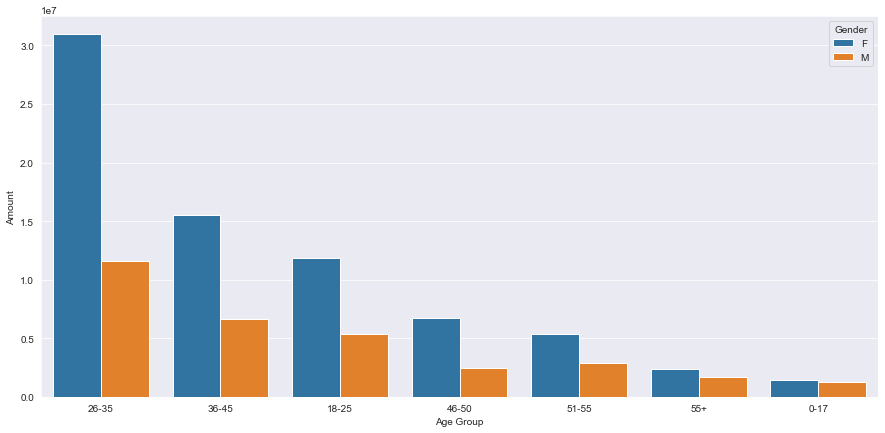

In [145]:
plt.figure(figsize=(15,7))
sns.set_context('paper', font_scale=1.5)
sns.barplot(x='Age Group',y='Amount',data=sales_age_group.sort_values(by='Amount',ascending=False),hue='Gender')

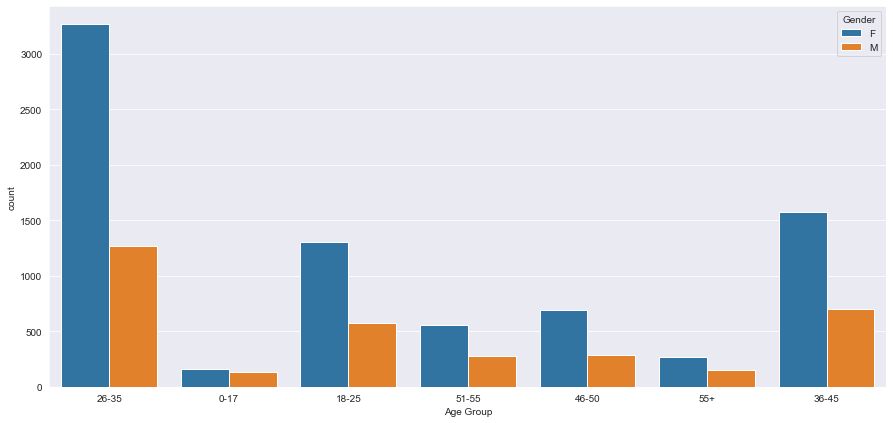

In [149]:
plt.figure(figsize=(15,7))
sns.countplot(x='Age Group', data=df,hue='Gender')

In [159]:
# Total number of orders from top 10 states
df.head()
df[['State','Orders']]

,State,Orders
0,Maharashtra,1
1,Andhra Pradesh,3
2,Uttar Pradesh,3
3,Karnataka,2
4,Gujarat,2
...,...,...
11246,Maharashtra,4
11247,Haryana,3
11248,Madhya Pradesh,4
11249,Karnataka,3


In [167]:
state_orders_10 = df.groupby(by=['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
state_orders_10

,State,Orders
14,Uttar Pradesh,4803
10,Maharashtra,3798
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1106
3,Gujarat,1063


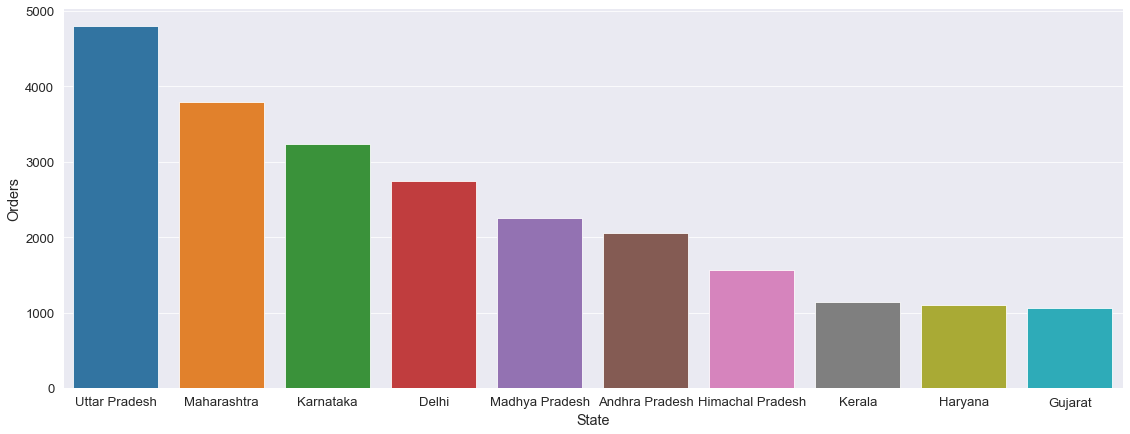

In [171]:
plt.figure(figsize=(19,7))
sns.set_context('paper', font_scale=1.5)
sns.barplot(x='State',y='Orders',data=state_orders_10)

In [173]:
# total amount from top 10 state
df.head()
df[['State',  'Amount']]

,State,Orders,Amount
0,Maharashtra,1,23952.0
1,Andhra Pradesh,3,23934.0
2,Uttar Pradesh,3,23924.0
3,Karnataka,2,23912.0
4,Gujarat,2,23877.0
...,...,...,...
11246,Maharashtra,4,370.0
11247,Haryana,3,367.0
11248,Madhya Pradesh,4,213.0
11249,Karnataka,3,206.0


In [ ]:
df.groupby(by=['State'],as_index=False)

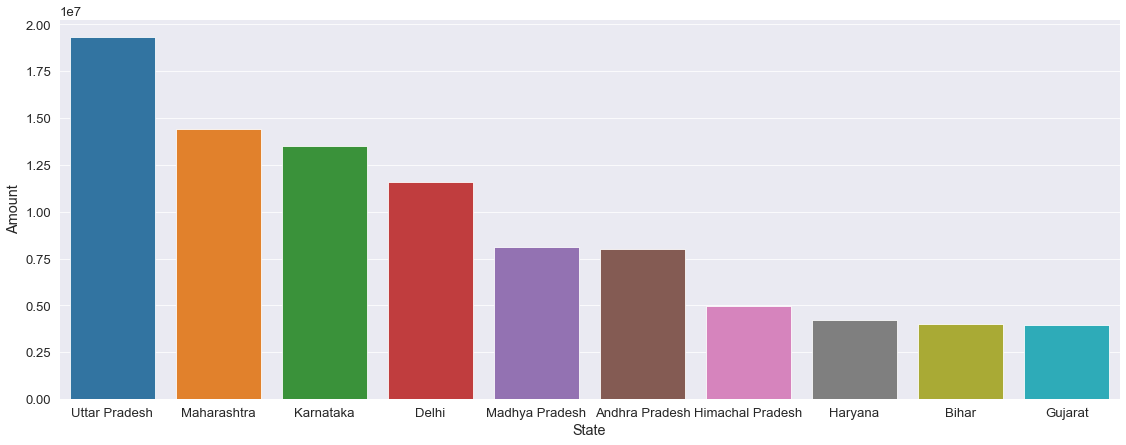

In [175]:
plt.figure(figsize=(19,7))
sns.set_context('paper', font_scale=1.5)
sns.barplot(x='State',y='Amount',data=df.groupby(by=['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10))

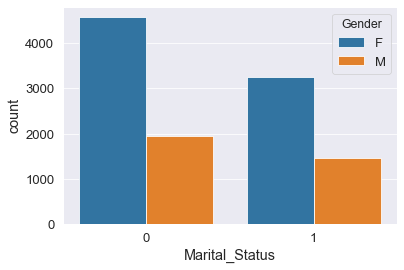

In [184]:
#plt.figure(figsize=(19,7))
sns.set_context('paper', font_scale=1.5)
sns.countplot(df['Marital_Status'],hue=df['Gender'])

In [185]:
df.groupby(by=['Marital_Status','Gender'],as_index=False)['Amount'].sum()

,Marital_Status,Gender,Amount
0,0,F,43778560.44
1,0,M,18320176.00
2,1,F,30529121.99
3,1,M,13550970.00


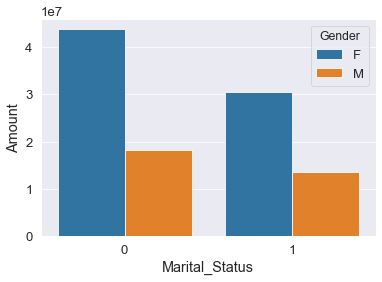

In [187]:
#plt.figure(figsize=(19,7))
sns.set_context('paper', font_scale=1.5)
sns.barplot(x='Marital_Status',y='Amount', data=df.groupby(by=['Marital_Status','Gender'],as_index=False)['Amount'].sum(), hue='Gender')

In [190]:
# Top ten most sold products

top_ten_product = df.groupby(by=['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

In [191]:
top_ten_product

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
171,P00025442,79
679,P00114942,79
888,P00145042,76
708,P00117942,76
298,P00044442,75
643,P00110842,74


<Figure size 1368x504 with 0 Axes>

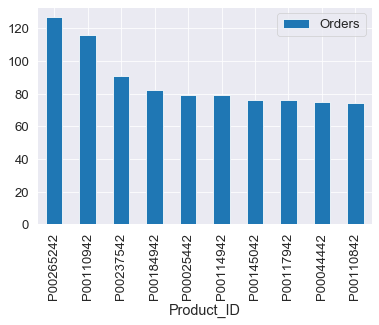

In [194]:
# Top ten most sold products

top_ten_product = df.groupby(by=['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(19,7))
sns.set_context('paper', font_scale=1.5)
#sns.barplot(x='Product_ID',y='Orders',data=top_ten_product)
top_ten_product.plot(kind='bar', x='Product_ID')